<img src='https://www.wekeo.eu/images/logo-large.png' div style="text-align:center" width='15%'> 

<div class="alert alert-block alert-success">
<h3> The Wildfires in Chile</h3></div>


This notebook was created as part of a EUMETSAT internship for High School Students in March 2024. 

**Author:** Jakob Fehlinger <br>
**Tutor:**  Anna-Lena Erdmann <br>

**Internship time**: March/2024 <br>
**Notebook last updated**: January/2025

<div class="alert alert-info" role="alert">

    
## <a id='content'></a> Contents




 - [1. Introduction](#intro)
 - [2. Map of the Wildfire](#map)
 - [3. Importing](#importing)
 - [4. Sentinel 3 Optical Imagery](#sentinel3)
     - [4.1 Downloading Data](#downloading)
     - [4.2 Plotting](#plot)
 - [5. CAMS Black Carbon Atmospheric Forecast](#carbon)
     - [5.1 Downloading Data](#download)
     - [5.2 Visualization](#visualize)
 - [6. Tropomi Data](#tropomi)
     - [6.1 Downloading Data](#downloads)
     - [6.2 Plotting](#ggs)
 - [7. Conclusion](#conc)

<div class="alert alert-info" role="alert">

    
## 1. <a id='intro'></a> Introduction
[Back to top](#content)

### **Information**

In this notebook the Wildfire in Chile has been analysed from the 1.02.24 to the 9.02.24.
162 forest fires occured in Chile from the 1.02.24 to the 4.02.24. 43.000 hectares of Land were affected by the fires. The worst of these fires happened in the Valparaiso Region. Chile experienced unusually high temperatures reaching up to 40°C in some areas. In the Valparaiso Region thousands of people had to be evacuated from their homes. Many different fires broke out in that region. Some of the fires even affected up to 30 hectares of land individually.


### **How EO sees wildfires**

Data from satellites can be used to help see how the situation was in Chile during the wildfires. The satellites can detect whether there was a fire somewhere easily.

We used data from satellites to see the wildfire situation in Chile. We used Sentinel 3 for optical imagery to see the area in a clear way, and to see the smoke from the fire. The pictures have different band combinations so that we can see the same picture in multiple different ways. CAMS atmospheric forecast for wildfire emissions was also used in this notebook. It was used to see the concentration of black carbon in Chile during the wildfires. Large amounts of Black Carbon are released into the air from fire, so it is a good method to detect wildfires. Another way of seeing wildfires using earth observation data is using the data from Sentinel 5P. Sentinel 5P tropomi data was used in this notebook to measure the concentration of carbon monoxide in one vertical column.

data set id used:
* `EO:ECMWF:DAT:CAMS_GLOBAL_ATMOSPHERIC_COMPOSITION_FORECASTS`
* `EO:EUM:DAT:SENTINEL-3:OL_1_EFR___`
* `EO:ESA:DAT:SENTINEL-5P:TROPOMI`
* from www.wekeo.eu

### **Learning Outcomes**
At the end of this notebook you will know,

* How to download data from WEkEO on the JupyterHub
* How wildfires look in different earth observation data sets
* How to plot data on a graph with different wavelengths
* How to create a gif from your dataset
* How to crop your original data into a smaller and more specific image


<div class="alert alert-info" role="alert">

    
## 2. <a id='map'></a> Map of the Wildfire
[Back to top](#content)

Here is the area affected by the Wildfire.


<img src='../img/CEMS_chile_wildfire_map.PNG' align='centre' width='75%'></img>
<center>Figure: The Imact of the chile wildfire, map provided by the Copernicus Emergency service.</center>
<br>

<div class="alert alert-info" role="alert">

    
## 3. <a id='importing'></a>  Importing
[Back to top](#content)

### **Installing and Importing**

In [3]:
pip install basemap --quiet

DEPRECATION: Loading egg at /opt/conda/envs/wekeolab/lib/python3.11/site-packages/eumartools_benloveday-0.0.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install earthkit-data

DEPRECATION: Loading egg at /opt/conda/envs/wekeolab/lib/python3.11/site-packages/eumartools_benloveday-0.0.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


`NOTE: If the previous command did not work, install it in the terminal instead.`

In [5]:
import warnings
warnings.filterwarnings("ignore")
import hda          
import xarray as xr                
import glob                         
import numpy as np                  
import eumartools                   
import matplotlib.pyplot as plt    
import inspect                     
import os
import climetlab as cml
from climetlab_wekeo_datasets import hda2cml
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors
import imageio
from IPython.display import Image
import zipfile

In [7]:
%run functions.ipynb

In [ ]:
notebook_dir = os.getcwd()

<hr>
<div class="alert alert-danger" role="alert">

## 4. <a id='sentinel3'></a>Sentinel 3 Optical Imagery
[Back to top](#content)


<hr>
<div class="alert alert-info" role="alert">

## 4.1 <a id='downloading'></a>Downloading Data
[Back to top](#content)

In [8]:
q = {
  "dataset_id": "EO:EUM:DAT:SENTINEL-3:OL_1_EFR___",
  "publication": "2021-12-20T09:47:09.915Z",
  "startdate": "2024-02-03T14:20:30.000Z",
  "enddate": "2024-02-03T14:40:30.000Z",
  "bbox": [
        -71.8437738160948,
        -33.381344455769614,
        -71.03369403306667,
        -32.23925100650842
  ],
  "type": "OL_1_EFR___",
  "timeliness": "NT",
  "itemsPerPage": 200,
  "startIndex": 0
}

In [9]:
c = hda.Client()

In [10]:
matches = c.search(q)

In [11]:
matches

SearchResults[items=1,volume=609.9MB]

In [14]:
matches.download()

In [15]:
fdst = 'S3B_OL_1_EFR____20240203T142043_20240203T142343_20240204T170133_0179_089_167_3420_MAR_O_NT_002.SEN3.zip'

In [16]:
download_dir = os.path.join(os.getcwd(), "products")

In [17]:
with zipfile.ZipFile(fdst, 'r') as zip_ref:
    zip_ref.extractall(download_dir)
    print(f'Unzipping of product {fdst} finished.')
    os.remove(fdst)

Unzipping of product S3B_OL_1_EFR____20240203T142043_20240203T142343_20240204T170133_0179_089_167_3420_MAR_O_NT_002.SEN3.zip finished.


<hr>
<div class="alert alert-info" role="alert">

## 4.2 <a id='plot'></a> Plotting
[Back to top](#content)

In [18]:
file_dir = os.path.join(download_dir, "S3B_OL_1_EFR____20240203T142043_20240203T142343_20240204T170133_0179_089_167_3420_MAR_O_NT_002.SEN3")

In [19]:
grid_reduce = 1
band_vars = xr.open_mfdataset(glob.glob(os.path.join(file_dir,'Oa*.nc')))
band_dict = {}
bands_needed = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 17]

for band_var in band_vars:
    band_num = int(band_var.split('_')[0][2:])
    if band_num not in bands_needed:
        print(f"Skipping: {band_var}, because we dont need it")
    else:
        print(f"Reading:  {band_var}")
        band_dict[band_var] = band_vars[band_var].data[3000:3900:grid_reduce,3000:4200:grid_reduce]

band_vars.close()

Reading:  Oa01_radiance
Reading:  Oa02_radiance
Reading:  Oa03_radiance
Reading:  Oa04_radiance
Reading:  Oa05_radiance
Reading:  Oa06_radiance
Reading:  Oa07_radiance
Reading:  Oa08_radiance
Reading:  Oa09_radiance
Reading:  Oa10_radiance
Reading:  Oa11_radiance
Skipping: Oa12_radiance, because we dont need it
Skipping: Oa13_radiance, because we dont need it
Skipping: Oa14_radiance, because we dont need it
Skipping: Oa15_radiance, because we dont need it
Skipping: Oa16_radiance, because we dont need it
Reading:  Oa17_radiance
Skipping: Oa18_radiance, because we dont need it
Skipping: Oa19_radiance, because we dont need it
Skipping: Oa20_radiance, because we dont need it
Skipping: Oa21_radiance, because we dont need it


In [20]:
# Natural colour single band
red_recipe = band_dict['Oa08_radiance']
green_recipe = band_dict['Oa06_radiance']
blue_recipe = band_dict['Oa02_radiance']

rgb_nat = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_nat_norm = eumartools.normalise_image(rgb_nat)

In [21]:
# Tristimulus
red_recipe = np.log10(1.0 + 0.01 * band_dict['Oa01_radiance'] + 0.09 * band_dict['Oa02_radiance'] 
                      + 0.35 * band_dict['Oa03_radiance'] + 0.04 * band_dict['Oa04_radiance'] 
                      + 0.01 * band_dict['Oa05_radiance'] + 0.59 * band_dict['Oa06_radiance'] 
                      + 0.85 * band_dict['Oa07_radiance'] + 0.12 * band_dict['Oa08_radiance'] 
                      + 0.07 * band_dict['Oa09_radiance'] + 0.04 * band_dict['Oa10_radiance'])
green_recipe = np.log10(1.0 + 0.26 * band_dict['Oa03_radiance'] + 0.21 * band_dict['Oa04_radiance'] 
                        + 0.50 * band_dict['Oa05_radiance'] + band_dict['Oa06_radiance'] 
                        + 0.38 * band_dict['Oa07_radiance'] + 0.04 * band_dict['Oa08_radiance'] 
                        + 0.03 * band_dict['Oa09_radiance'] + 0.02 * band_dict['Oa10_radiance'])
blue_recipe = np.log10(1.0 + 0.07 * band_dict['Oa01_radiance'] + 0.28 * band_dict['Oa02_radiance'] 
                       + 1.77 * band_dict['Oa03_radiance'] + 0.47 * band_dict['Oa04_radiance'] 
                       + 0.16 * band_dict['Oa05_radiance'])

rgb_tri = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_tri_norm = eumartools.normalise_image(rgb_tri)

In [22]:
# Natural colour broad band, log scaled
red_recipe = 0.16666 * band_dict['Oa09_radiance'] + 0.66666 * band_dict['Oa09_radiance'] \
             + 0.08333 * band_dict['Oa10_radiance'] + 0.08333 * band_dict['Oa11_radiance']
green_recipe = 0.16666 *  band_dict['Oa05_radiance'] + 0.66666 *  band_dict['Oa06_radiance'] \
               + 0.16666 *  band_dict['Oa07_radiance']
blue_recipe = 0.16666 *  band_dict['Oa02_radiance'] + 0.66666 *  band_dict['Oa03_radiance'] \
               + 0.16666 *  band_dict['Oa04_radiance']

rgb_log = np.dstack(((np.log10(red_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795,
                    (np.log10(green_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795,
                    (np.log10(blue_recipe * 0.01) + 1.6516951369518393) / 1.9887713527138795))
                     
rgb_log_norm = eumartools.normalise_image(rgb_log)

In [23]:
# False colour
red_recipe = band_dict['Oa17_radiance']
green_recipe = band_dict['Oa06_radiance']
blue_recipe = band_dict['Oa02_radiance']

rgb_fls = np.dstack((red_recipe, green_recipe, blue_recipe))
rgb_fls_norm = eumartools.normalise_image(rgb_fls)

Below we can see the same image 4 times but with different band combinations. Tristimulus and Natural color bands are all versions of what earth would look like if you were in space. False color 17:6:2 changes the color of the image to see the difference between different areas more clearly.

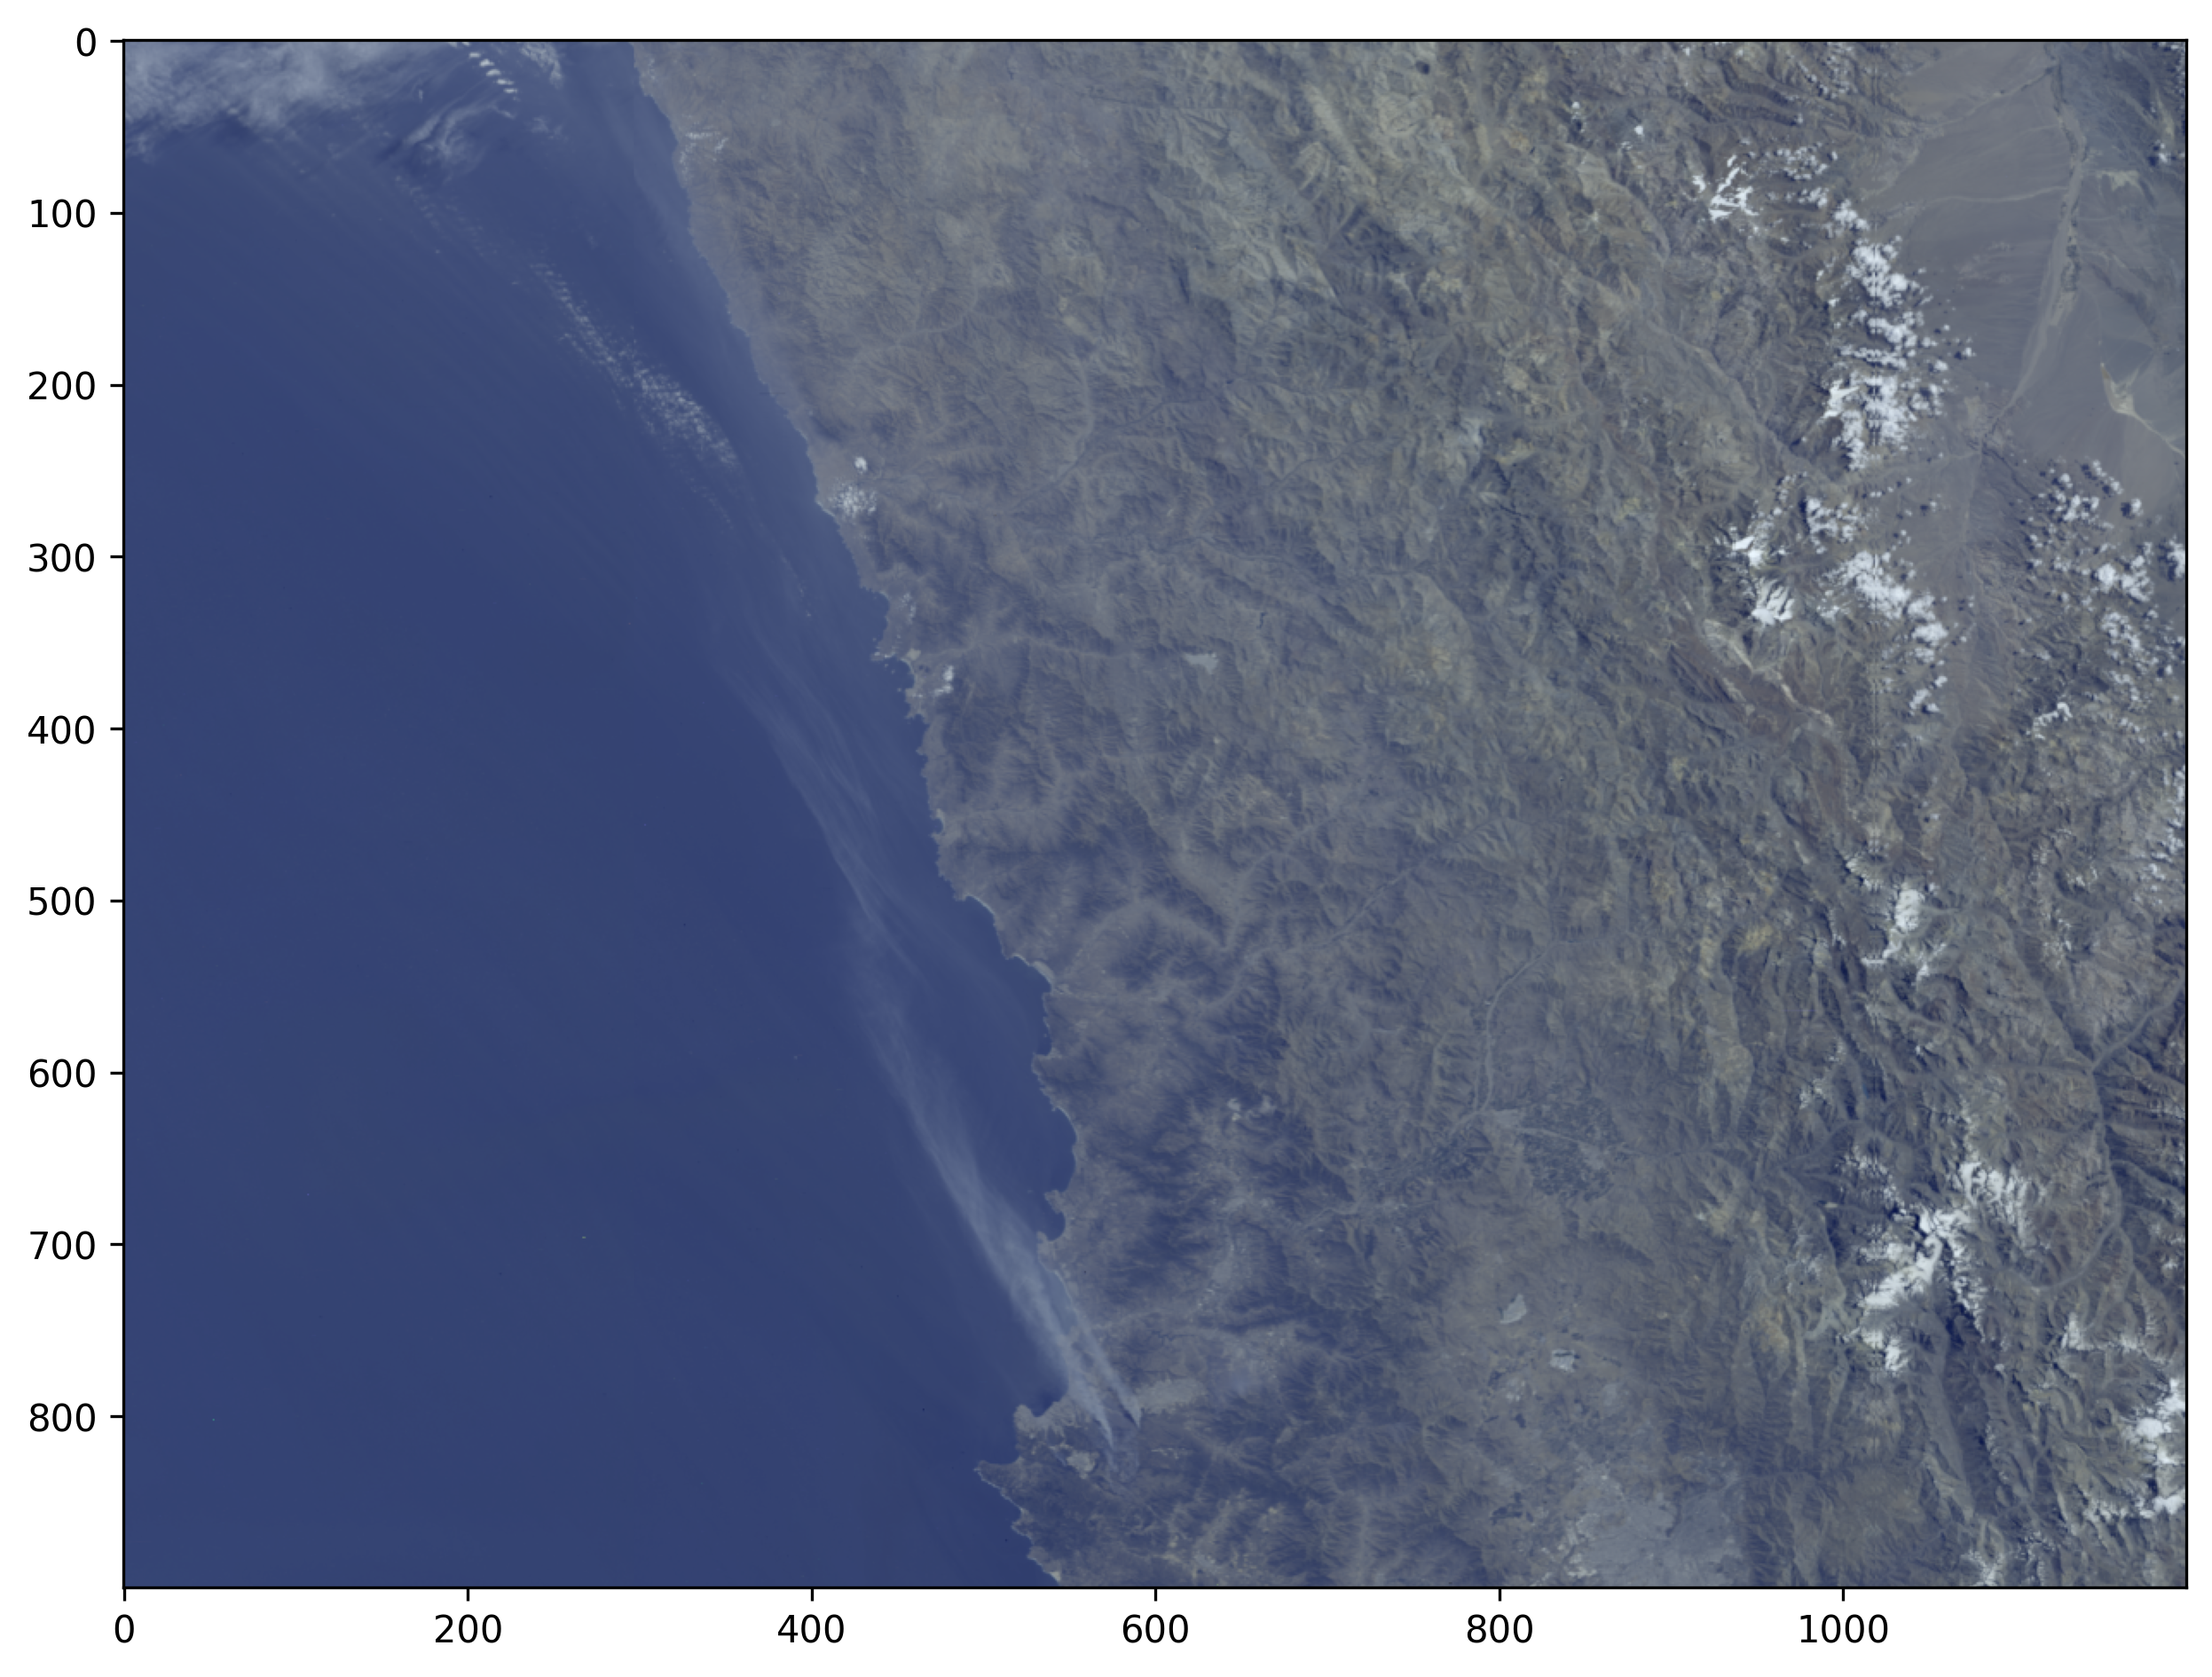

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
axs.imshow(rgb_tri_norm)
plt.imsave('olci_wildfire.png', rgb_tri_norm);


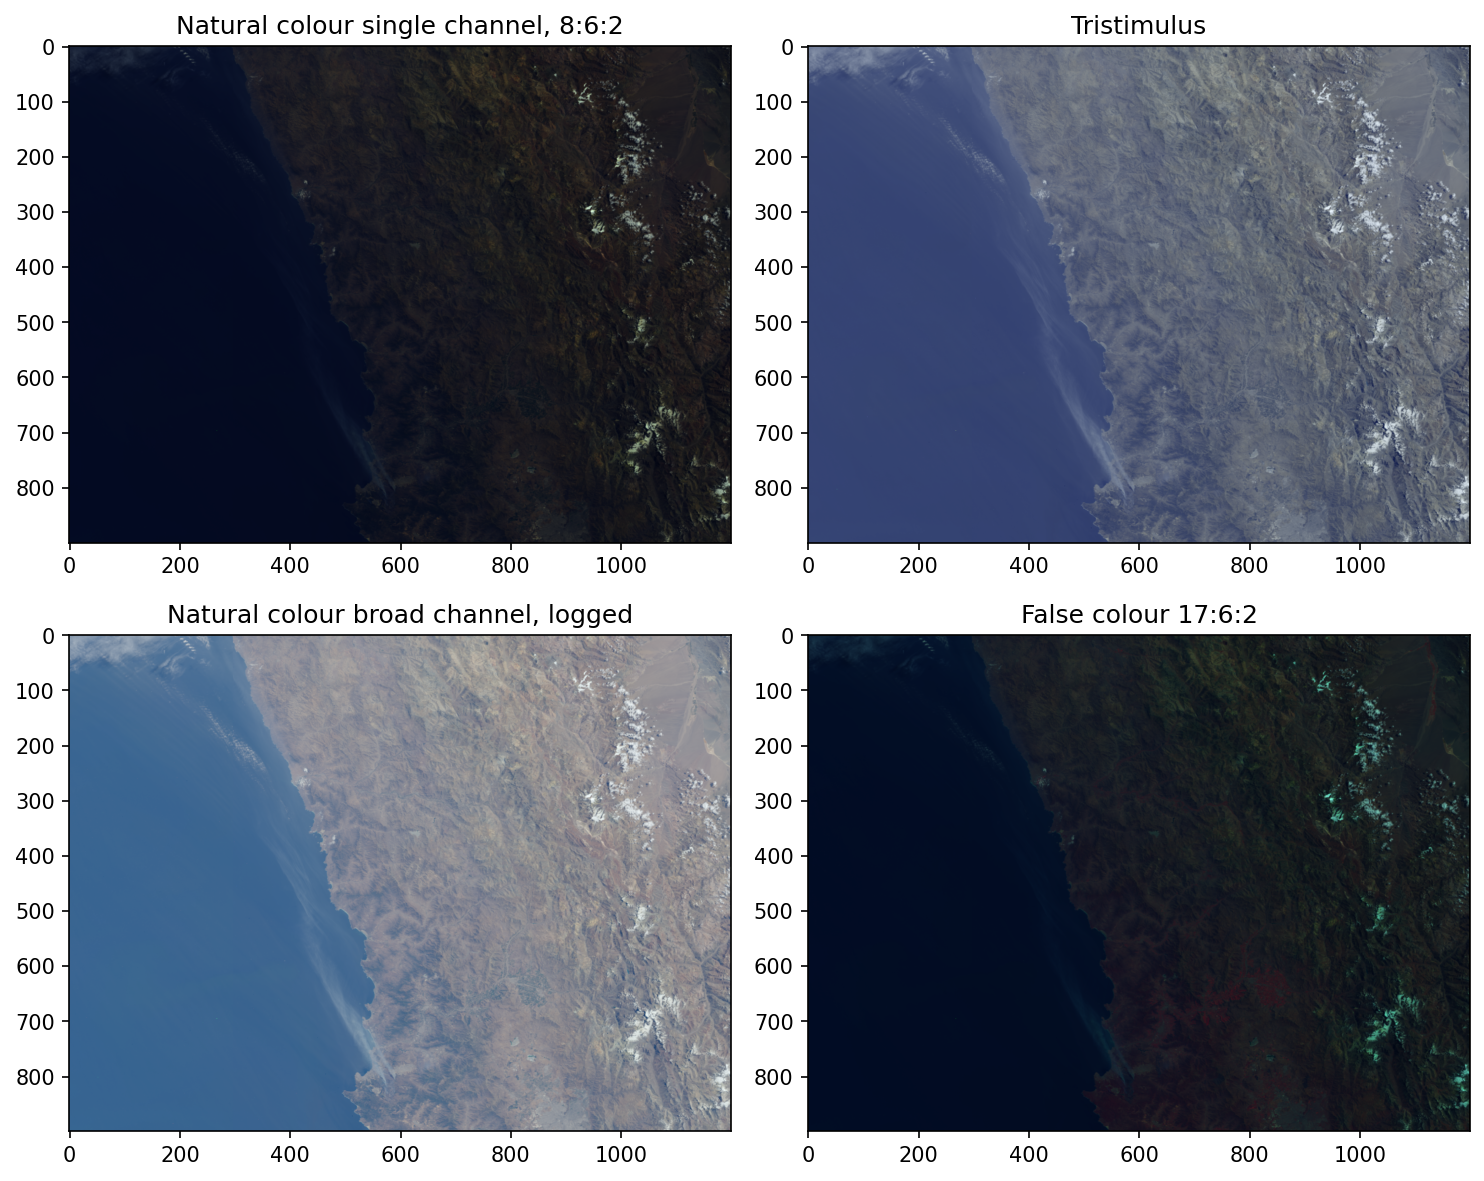

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=150)

axs[0,0].imshow(rgb_nat_norm); axs[0,0].title.set_text('Natural colour single channel, 8:6:2')
axs[0,1].imshow(rgb_tri_norm); axs[0,1].title.set_text('Tristimulus')
axs[1,0].imshow(rgb_log_norm); axs[1,0].title.set_text('Natural colour broad channel, logged')
axs[1,1].imshow(rgb_fls_norm); axs[1,1].title.set_text('False colour 17:6:2')

plt.tight_layout()

<hr>
<div class="alert alert-danger" role="alert">

## 5. <a id='carbon'></a>CAMS Black Carbon Atmospheric Forecast
[Back to top](#content)

<hr>
<div class="alert alert-info" role="alert">

## 5.1 <a id='download'></a>Downloading Data
[Back to top](#content)


In [26]:
camsrequest= {
  "dataset_id": "EO:ECMWF:DAT:CAMS_GLOBAL_ATMOSPHERIC_COMPOSITION_FORECASTS",
  "startdate": "2024-02-01T00:00:00.000Z",
  "enddate": "2024-02-09T00:00:00.000Z",
  "variable": [
    "black_carbon_aerosol_optical_depth_550nm"
  ],
  "time": [
    "00:00",
    "12:00"
  ],
  "leadtime_hour": [
    "0"
  ],
  "type": [
    "forecast"
  ],
  "data_format": "netcdf_zip",
  "nocache": "True",
  "itemsPerPage": 200,
  "startIndex": 0
}


In [33]:
import earthkit.data
os.chdir(os.path.expanduser('~'))

print (os.getcwd())

/home/jovyan


In [34]:

ds_cams = earthkit.data.from_source(
        "wekeo",
        "EO:ECMWF:DAT:CAMS_GLOBAL_ATMOSPHERIC_COMPOSITION_FORECASTS",
        request={
  "dataset_id": "EO:ECMWF:DAT:CAMS_GLOBAL_ATMOSPHERIC_COMPOSITION_FORECASTS",
  "startdate": "2024-02-01T00:00:00.000Z",
  "enddate": "2024-02-09T00:00:00.000Z",
  "variable": [
    "black_carbon_aerosol_optical_depth_550nm"
  ],
  "time": [
    "00:00",
    "12:00"
  ],
  "leadtime_hour": [
    "0"
  ],
  "type": [
    "forecast"
  ],
  "data_format": "netcdf_zip",
  "nocache": "True",
  "itemsPerPage": 200,
  "startIndex": 0
}
    )

os.chdir(notebook_dir)

  0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
os.chdir(notebook_dir)

In [37]:
blackcarbon = ds_cams.to_xarray()

In [38]:
blackcarbon

<xarray.Dataset> Size: 29MB
Dimensions:                  (forecast_period: 1, forecast_reference_time: 18,
                              latitude: 451, longitude: 900)
Coordinates:
  * forecast_period          (forecast_period) timedelta64[ns] 8B 00:00:00
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 144B 20...
  * latitude                 (latitude) float64 4kB 90.0 89.6 ... -89.6 -90.0
  * longitude                (longitude) float64 7kB 0.0 0.4 0.8 ... 359.2 359.6
    valid_time               (forecast_reference_time, forecast_period) datetime64[ns] 144B dask.array<chunksize=(18, 1), meta=np.ndarray>
Data variables:
    bcaod550                 (forecast_period, forecast_reference_time, latitude, longitude) float32 29MB dask.array<chunksize=(1, 9, 226, 450), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-28T14:05 GRIB to CDM+CF via cfgrib-0.9.1...

<hr>
<div class="alert alert-info" role="alert">

## 5.2 <a id='visualize'></a>Visualization
[Back to top](#content)

In [39]:
blackcarbon.coords['longitude'] = (blackcarbon.coords['longitude'] + 180) % 360 - 180
blackcarbon_reshaped = blackcarbon.sortby(blackcarbon.longitude)

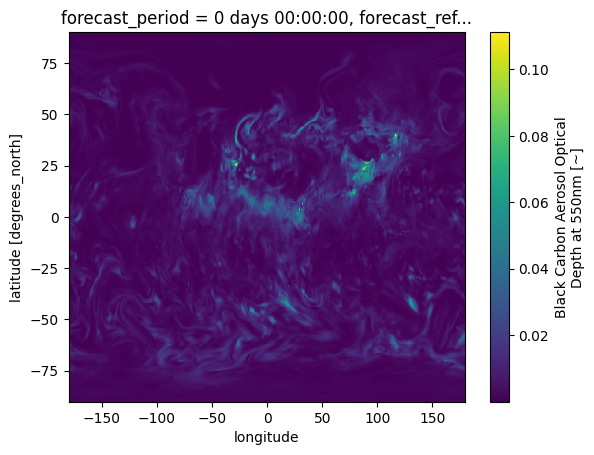

In [40]:
blackcarbon_reshaped.bcaod550.isel(forecast_reference_time=3).plot()

In [41]:
blackcarbon_chile = blackcarbon_reshaped.sel( latitude=slice(-6,-40), longitude = slice(-85, -52))
blackcarbon_chile

<xarray.Dataset> Size: 510kB
Dimensions:                  (forecast_period: 1, forecast_reference_time: 18,
                              latitude: 85, longitude: 83)
Coordinates:
  * forecast_period          (forecast_period) timedelta64[ns] 8B 00:00:00
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 144B 20...
  * latitude                 (latitude) float64 680B -6.0 -6.4 ... -39.2 -39.6
    valid_time               (forecast_reference_time, forecast_period) datetime64[ns] 144B dask.array<chunksize=(18, 1), meta=np.ndarray>
  * longitude                (longitude) float64 664B -84.8 -84.4 ... -52.0
Data variables:
    bcaod550                 (forecast_period, forecast_reference_time, latitude, longitude) float32 508kB dask.array<chunksize=(1, 9, 85, 83), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-28T14:05 GRIB to CDM+CF via cfgrib-0.9.1...

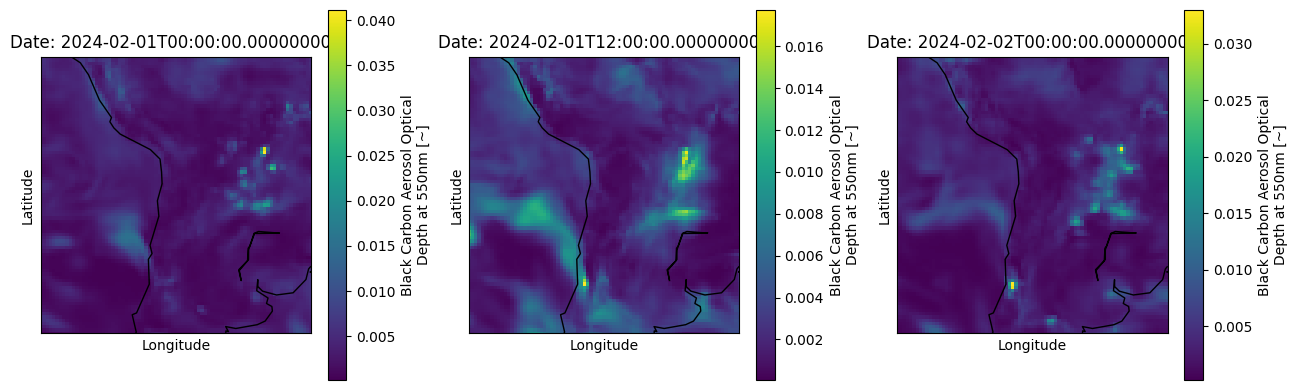

In [42]:
#written with the help of chatgpt
# Select the three time steps you want to plot
time_steps = [0, 1, 2]
dates = blackcarbon_chile.forecast_reference_time.isel(forecast_reference_time=time_steps).values

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Plot each time step on a separate subplot
for i, t in enumerate(time_steps):
    # Select data for the specific time step
    data = blackcarbon_chile['bcaod550'].isel(forecast_reference_time=t)
    
    # Plot the data on the corresponding subplot
    data.plot(ax=axes[i], label=None)
    
    # Set title for each subplot
    axes[i].set_title(f'Date: {dates[i]}')
    
    # Optionally set labels for axes
    axes[i].set_xlabel('Longitude')
    axes[i].set_ylabel('Latitude')

    # Add coastlines using Basemap
    m = Basemap(projection='cyl', ax=axes[i], llcrnrlon=data.longitude.min(), llcrnrlat=data.latitude.min(),
                urcrnrlon=data.longitude.max(), urcrnrlat=data.latitude.max())
    m.drawcoastlines()

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()

In [43]:
variable = blackcarbon_chile['bcaod550']
variable.isel(forecast_period=0)
#variable

<xarray.DataArray 'bcaod550' (forecast_reference_time: 18, latitude: 85,
                              longitude: 83)> Size: 508kB
dask.array<getitem, shape=(18, 85, 83), dtype=float32, chunksize=(9, 85, 83), chunktype=numpy.ndarray>
Coordinates:
    forecast_period          timedelta64[ns] 8B 00:00:00
  * forecast_reference_time  (forecast_reference_time) datetime64[ns] 144B 20...
  * latitude                 (latitude) float64 680B -6.0 -6.4 ... -39.2 -39.6
    valid_time               (forecast_reference_time) datetime64[ns] 144B dask.array<chunksize=(18,), meta=np.ndarray>
  * longitude                (longitude) float64 664B -84.8 -84.4 ... -52.0
Attributes: (12/33)
    GRIB_paramId:                             210211
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      405900
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_units:                               ~
    long_name:                                Black Carbon Aerosol Optical De...
    units:                                    ~
    standard_name:                            unknown
    GRIB_number:                              0
    GRIB_surface:                             0.0

In [47]:
# Extract the variable and its time coordinates
variable = blackcarbon_chile['bcaod550'].isel(forecast_period=0)
time_coords = variable.forecast_reference_time.values

# Find the maximum and minimum values across all time steps
min_val, max_val = variable.min().values, variable.max().values

# Create a color normalization object to maintain consistent scale across frames
norm = mcolors.Normalize(vmin=min_val, vmax=max_val)

# Define the point coordinates and size
point_lon, point_lat = -71.08, -33.36
point_size = 70

# Plot and save each time step as a frame
frames = []
for i, time_step in enumerate(time_coords):
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(variable.longitude, variable.latitude, variable.sel(forecast_reference_time=time_step), norm=norm, shading='nearest') #, shading='auto')
    plt.title(f'Time Step: {time_step}')
    plt.colorbar(label='bcaod550')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Add coastlines using Basemap
    m = Basemap(projection='cyl', llcrnrlon=variable.longitude.min(), llcrnrlat=variable.latitude.min(),
                urcrnrlon=variable.longitude.max(), urcrnrlat=variable.latitude.max())
    m.drawcoastlines()
    
    # Mark the point on the plot for specific time steps
    if i in [3, 2, 6, 7, 8, 9]:
        x, y = m(point_lon, point_lat)
        plt.scatter(x, y, facecolors='none', edgecolors='red', marker='o', s=point_size, label='Wildfire')
        plt.text(x, y, 'Wildfire', color='red', fontsize=12, ha='left', va='bottom')

    dir_path = 'frames'
    frame_path = f'{dir_path}/frame_{i}.png'

    # Check if the directory exists, and create it if it doesn't
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        
    plt.savefig(frame_path)
    plt.close()
    frames.append(imageio.imread(frame_path))

# Create the looping GIF with 5 seconds duration per frame
gif_path = 'chilewildfire.gif'
imageio.mimsave(gif_path, frames, fps=1, loop=0)

print(f'GIF saved to: {gif_path}')

GIF saved to: chilewildfire.gif


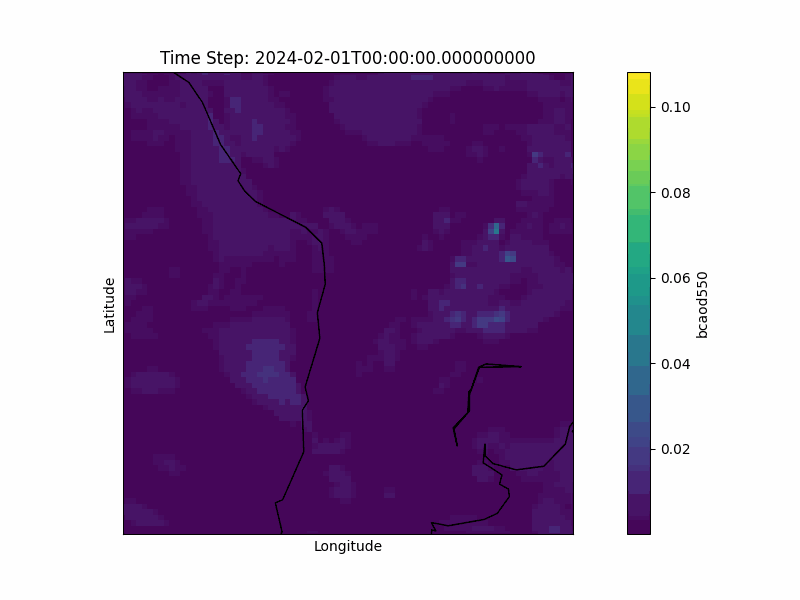

In [48]:
gif_path = 'chilewildfire.gif'
Image(filename=gif_path)

<hr>
<div class="alert alert-danger" role="alert">

## 6. <a id='tropomi'></a>Tropomi Sentinel 5P
[Back to top](#content)

<hr>
<div class="alert alert-info" role="alert">

## 6.1 <a id='downloads'></a>Downloading Data
[Back to top](#content)

At the time that this notebook was created it wasnt possible to download the data with hda, so here is an alternative solution:

We are going to be using 2 datesets for this section. Download the data from <a href="https://www.wekeo.eu/data?view=viewer&t=1706970555607&z=0&center=-71.08914%2C-32.57703&zoom=17.33&layers=W3siaWQiOiJjMCIsIm9wZW5EcmF3ZXJOYW1lIjoic3Vic2V0dGVyIiwicmVwbGFjZW1lbnRDb2xvck1hcElkIjpudWxsLCJsYXllcklkIjoiRU86RVNBOkRBVDpTRU5USU5FTC01UDpUUk9QT01JL19fREVGQVVMVF9fL19fREVGQVVMVF9fIiwiekluZGV4IjoxMH1d&objects=W3siaWQiOiJjMCIsInR5cGUiOiJhb2kiLCJjb29yZHMiOltbLTcxLjg0Mzc3MzgxNjA5NDgsLTMyLjIzOTI1MTAwNjUwODQyXSxbLTcxLjAzMzY5NDAzMzA2NjY3LC0zMy4zODEzNDQ0NTU3Njk2MTRdXX1d&initial=1&crs=epsg%3A38577" target="_blank">Sentinel 5P Tropomi</a>. Select L2 proccesing type and L2__CO____ product type. Put the downloaded data into your jupyterhub and then use the code below. The time should be 18:17 03/02/2024 and 18:02 04/02/2024.

In [49]:
zip_ref = zipfile.ZipFile('./S5P_NRTI_L2__CO_____20240203T181748_20240203T182248_32693_03_020600_20240203T190815.zip') 
zip_ref.extractall('./tropomi/')
zip_ref.close()

In [50]:
zip_re = zipfile.ZipFile('./S5P_NRTI_L2__CO_____20240204T180248_20240204T180748_32707_03_020600_20240204T185052.zip') 
zip_re.extractall('./tropomi/')
zip_re.close()

In [51]:
file_during = xr.open_dataset('./tropomi/S5P_NRTI_L2__CO_____20240203T181748_20240203T182248_32693_03_020600_20240203T190815/S5P_NRTI_L2__CO_____20240203T181748_20240203T182248_32693_03_020600_20240203T190815.nc', group='PRODUCT')
file_during

<xarray.Dataset> Size: 2MB
Dimensions:                                (scanline: 373, ground_pixel: 215,
                                            time: 1, corner: 4, layer: 50)
Coordinates:
  * scanline                               (scanline) float64 3kB 0.0 ... 372.0
  * ground_pixel                           (ground_pixel) float64 2kB 0.0 ......
  * time                                   (time) datetime64[ns] 8B 2024-02-03
  * corner                                 (corner) float64 32B 0.0 1.0 2.0 3.0
  * layer                                  (layer) float32 200B 4.95e+04 ... ...
    latitude                               (time, scanline, ground_pixel) float32 321kB ...
    longitude                              (time, scanline, ground_pixel) float32 321kB ...
Data variables:
    delta_time                             (time, scanline) datetime64[ns] 3kB ...
    time_utc                               (time, scanline) object 3kB ...
    qa_value                               (time, scanline, ground_pixel) float32 321kB ...
    carbonmonoxide_total_column            (time, scanline, ground_pixel) float32 321kB ...
    carbonmonoxide_total_column_precision  (time, scanline, ground_pixel) float32 321kB ...
    carbonmonoxide_total_column_corrected  (time, scanline, ground_pixel) float32 321kB ...

In [52]:
file_after= xr.open_dataset('./tropomi/S5P_NRTI_L2__CO_____20240204T180248_20240204T180748_32707_03_020600_20240204T185052/S5P_NRTI_L2__CO_____20240204T180248_20240204T180748_32707_03_020600_20240204T185052.nc', group='PRODUCT')
file_after

<xarray.Dataset> Size: 2MB
Dimensions:                                (scanline: 373, ground_pixel: 215,
                                            time: 1, corner: 4, layer: 50)
Coordinates:
  * scanline                               (scanline) float64 3kB 0.0 ... 372.0
  * ground_pixel                           (ground_pixel) float64 2kB 0.0 ......
  * time                                   (time) datetime64[ns] 8B 2024-02-04
  * corner                                 (corner) float64 32B 0.0 1.0 2.0 3.0
  * layer                                  (layer) float32 200B 4.95e+04 ... ...
    latitude                               (time, scanline, ground_pixel) float32 321kB ...
    longitude                              (time, scanline, ground_pixel) float32 321kB ...
Data variables:
    delta_time                             (time, scanline) datetime64[ns] 3kB ...
    time_utc                               (time, scanline) object 3kB ...
    qa_value                               (time, scanline, ground_pixel) float32 321kB ...
    carbonmonoxide_total_column            (time, scanline, ground_pixel) float32 321kB ...
    carbonmonoxide_total_column_precision  (time, scanline, ground_pixel) float32 321kB ...
    carbonmonoxide_total_column_corrected  (time, scanline, ground_pixel) float32 321kB ...

In [53]:
file_during_co = file_during['carbonmonoxide_total_column']
file_after_co = file_after['carbonmonoxide_total_column']

In [54]:
file_during_co

<xarray.DataArray 'carbonmonoxide_total_column' (time: 1, scanline: 373,
                                                 ground_pixel: 215)> Size: 321kB
[80195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 3kB 0.0 1.0 2.0 3.0 ... 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 2kB 0.0 1.0 2.0 ... 212.0 213.0 214.0
  * time          (time) datetime64[ns] 8B 2024-02-03
    latitude      (time, scanline, ground_pixel) float32 321kB ...
    longitude     (time, scanline, ground_pixel) float32 321kB ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

In [55]:
file_during_co = file_during_co[0,:,:]
file_during_co

file_after_co = file_after_co[0,:,:]
file_after_co

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 373,
                                                 ground_pixel: 215)> Size: 321kB
[80195 values with dtype=float32]
Coordinates:
  * scanline      (scanline) float64 3kB 0.0 1.0 2.0 3.0 ... 370.0 371.0 372.0
  * ground_pixel  (ground_pixel) float64 2kB 0.0 1.0 2.0 ... 212.0 213.0 214.0
    time          datetime64[ns] 8B 2024-02-04
    latitude      (scanline, ground_pixel) float32 321kB ...
    longitude     (scanline, ground_pixel) float32 321kB ...
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

In [56]:
conversion_factor_during = file_during_co.multiplication_factor_to_convert_to_molecules_percm2
print (conversion_factor_during)
conversion_factor_after = file_after_co.multiplication_factor_to_convert_to_molecules_percm2
print (conversion_factor_after)

6.022141e+19
6.022141e+19


<hr>
<div class="alert alert-info" role="alert">

## 6.2 <a id='ggs'></a>Plotting
[Back to top](#content)

In [57]:
lonmin, lonmax, latmin, latmax = -72, -71, -33.3, -32


In [58]:
file_during_co_subset = generate_geographical_subset(file_during_co, latmin, latmax, lonmin, lonmax)
file_during_co_subset

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 30, ground_pixel: 14)> Size: 2kB
array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 0.01828816,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan, 0.01753901, 0.01854045, 0.018131  ,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
        0.01689828, 0.01357254, 0.01685214, 0.02009642, 0.02075543,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 0.02174477, 0.01690878,
        0.02159111, 0.01440436, 0.01728632, 0.02199188, 0.02085113,
        0.01906733,        nan,        nan,        nan],
       [       nan, 0.02457746, 0.01795359, 0.02123841, 0.01816687,
               nan, 0.02332081, 0.01853354, 0.01994396, 0.02545433,
        0.02675583,        nan,        nan,        nan],
       [0.0146581 , 0.01902962, 0.02222692, 0.02102948, 0.02471984,
               nan, 0.02507984, 0.02217065, 0.02256476, 0.03158777,
        0.02481642,        nan,        nan,        nan],
       [       nan, 0.01830173, 0.        , 0.01572802, 0.02626172,
               nan,        nan, 0.02575072, 0.03002972, 0.03387605,
...
        0.03429535, 0.02446462, 0.0208845 , 0.02519999, 0.02191366,
        0.01802628, 0.01805195, 0.01807331,        nan],
       [       nan,        nan,        nan, 0.01993455, 0.01853672,
        0.02857569, 0.01604125, 0.01928227,        nan, 0.02312829,
        0.02266966, 0.02191503, 0.01956826, 0.02061738],
       [       nan,        nan,        nan, 0.0224436 , 0.01921788,
        0.0310372 , 0.02109736, 0.02277261,        nan, 0.02308145,
        0.02240024, 0.02113808, 0.02038535,        nan],
       [       nan,        nan,        nan, 0.01469917, 0.01889046,
        0.0278439 , 0.02035303, 0.02485538,        nan, 0.02257716,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 0.02716024, 0.02029962,
        0.02266214, 0.01729432, 0.02480363,        nan,        nan,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 0.01906031, 0.01873839,
        0.02526723,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan],
       [       nan,        nan,        nan, 0.0261624 ,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 240B 341.0 342.0 343.0 ... 369.0 370.0
  * ground_pixel  (ground_pixel) float64 112B 53.0 54.0 55.0 ... 64.0 65.0 66.0
    time          datetime64[ns] 8B 2024-02-03
    latitude      (scanline, ground_pixel) float32 2kB -33.51 -33.48 ... -31.78
    longitude     (scanline, ground_pixel) float32 2kB -71.94 -71.84 ... -71.07
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

In [59]:
file_after_co_subset = generate_geographical_subset(file_after_co, latmin, latmax, lonmin, lonmax)
file_after_co_subset

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 29, ground_pixel: 7)> Size: 812B
array([[       nan,        nan,        nan,        nan, 0.02963134,
               nan,        nan],
       [       nan,        nan,        nan, 0.02515341, 0.03108945,
               nan,        nan],
       [       nan,        nan, 0.02525237, 0.02522178, 0.0309465 ,
               nan,        nan],
       [       nan, 0.0188949 , 0.02359517, 0.02659632, 0.02758194,
               nan,        nan],
       [0.01986001, 0.0220735 , 0.02701875, 0.02639234, 0.03034961,
               nan,        nan],
       [0.0175852 , 0.02329893, 0.02366311, 0.02679868, 0.0295231 ,
               nan,        nan],
       [       nan, 0.02784879, 0.02415286, 0.02809743, 0.02723426,
        0.02737652,        nan],
       [0.01650733, 0.02744544, 0.02200228, 0.02750482, 0.02590882,
        0.02824492,        nan],
       [0.01907303, 0.02887047, 0.02217362, 0.02926312, 0.02918006,
        0.02888011,        nan],
       [0.01849168, 0.02883325, 0.02527759, 0.02192644, 0.02582754,
        0.03177653,        nan],
...
       [0.01614794, 0.02998657, 0.02594322, 0.02328353, 0.02089315,
        0.02923259,        nan],
       [0.01325721, 0.03017716, 0.02917972, 0.02225898, 0.02290002,
        0.02638944,        nan],
       [0.011616  , 0.0294792 , 0.02840195, 0.02244021, 0.02198511,
        0.02333684,        nan],
       [       nan, 0.02765222, 0.02831828, 0.02273605, 0.0216749 ,
        0.02383211,        nan],
       [       nan, 0.0304714 , 0.0269313 , 0.02312277, 0.02380457,
        0.02446328, 0.01859043],
       [       nan, 0.02613355, 0.02661303, 0.02300175, 0.02417318,
        0.02513697, 0.02180114],
       [       nan, 0.02876431, 0.02668794, 0.0225124 , 0.02260788,
               nan,        nan],
       [       nan, 0.02271432, 0.02647264, 0.02205478,        nan,
               nan,        nan],
       [       nan, 0.02309069, 0.02531327,        nan,        nan,
               nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 232B 77.0 78.0 79.0 ... 103.0 104.0 105.0
  * ground_pixel  (ground_pixel) float64 56B 20.0 21.0 22.0 23.0 24.0 25.0 26.0
    time          datetime64[ns] 8B 2024-02-04
    latitude      (scanline, ground_pixel) float32 812B -33.45 -33.4 ... -31.81
    longitude     (scanline, ground_pixel) float32 812B -71.81 -71.63 ... -71.05
Attributes:
    units:                                                 mol m-2
    standard_name:                                         atmosphere_mole_co...
    long_name:                                             Vertically integra...
    ancillary_variables:                                   carbonmonoxide_tot...
    multiplication_factor_to_convert_to_molecules_percm2:  6.022141e+19

In [60]:
s5p_co_converted_during = file_during_co_subset*conversion_factor_during
s5p_co_converted_during

s5p_co_converted_after = file_after_co_subset*conversion_factor_after
s5p_co_converted_after

<xarray.DataArray 'carbonmonoxide_total_column' (scanline: 29, ground_pixel: 7)> Size: 812B
array([[           nan,            nan,            nan,            nan,
        1.78444126e+18,            nan,            nan],
       [           nan,            nan,            nan, 1.51477394e+18,
        1.87225032e+18,            nan,            nan],
       [           nan,            nan, 1.52073302e+18, 1.51889134e+18,
        1.86364170e+18,            nan,            nan],
       [           nan, 1.13787757e+18, 1.42093420e+18, 1.60166752e+18,
        1.66102342e+18,            nan,            nan],
       [1.19599748e+18, 1.32929719e+18, 1.62710692e+18, 1.58938364e+18,
        1.82769646e+18,            nan,            nan],
       [1.05900569e+18, 1.40309435e+18, 1.42502617e+18, 1.61385423e+18,
        1.77792240e+18,            nan,            nan],
       [           nan, 1.67709333e+18, 1.45451919e+18, 1.69206689e+18,
        1.64008556e+18, 1.64865240e+18,            nan],
       [9.94094507e+17, 1.65280306e+18, 1.32500799e+18, 1.65637895e+18,
        1.56026555e+18, 1.70094889e+18,            nan],
       [1.14860462e+18, 1.73862008e+18, 1.33532691e+18, 1.76226645e+18,
        1.75726409e+18, 1.73920103e+18,            nan],
       [1.11359486e+18, 1.73637914e+18, 1.52225200e+18, 1.32044103e+18,
        1.55537066e+18, 1.91362715e+18,            nan],
...
       [9.72451789e+17, 1.80583336e+18, 1.56233744e+18, 1.40216691e+18,
        1.25821514e+18, 1.76042793e+18,            nan],
       [7.98367556e+17, 1.81731130e+18, 1.75724388e+18, 1.34046713e+18,
        1.37907139e+18, 1.58920909e+18,            nan],
       [6.99531769e+17, 1.77527890e+18, 1.71040551e+18, 1.35138088e+18,
        1.32397404e+18, 1.40537748e+18,            nan],
       [           nan, 1.66525572e+18, 1.70536700e+18, 1.36919668e+18,
        1.30529320e+18, 1.43520339e+18,            nan],
       [           nan, 1.83503062e+18, 1.62184081e+18, 1.39248598e+18,
        1.43354477e+18, 1.47321350e+18, 1.11954212e+18],
       [           nan, 1.57379944e+18, 1.60267412e+18, 1.38519787e+18,
        1.45574295e+18, 1.51378397e+18, 1.31289536e+18],
       [           nan, 1.73222752e+18, 1.60718542e+18, 1.35572849e+18,
        1.36147838e+18,            nan,            nan],
       [           nan, 1.36788826e+18, 1.59421984e+18, 1.32817005e+18,
                   nan,            nan,            nan],
       [           nan, 1.39055373e+18, 1.52440099e+18,            nan,
                   nan,            nan,            nan],
       [           nan,            nan,            nan,            nan,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
  * scanline      (scanline) float64 232B 77.0 78.0 79.0 ... 103.0 104.0 105.0
  * ground_pixel  (ground_pixel) float64 56B 20.0 21.0 22.0 23.0 24.0 25.0 26.0
    time          datetime64[ns] 8B 2024-02-04
    latitude      (scanline, ground_pixel) float32 812B -33.45 -33.4 ... -31.81
    longitude     (scanline, ground_pixel) float32 812B -71.81 -71.63 ... -71.05

In [61]:
data_array=s5p_co_converted_during*1e-18
longitude=s5p_co_converted_during.longitude
latitude=s5p_co_converted_during.latitude
projection=ccrs.PlateCarree()
color_scale='viridis' 
unit='*1e-18 molecules per cm2' 
long_name="CO concentration" + " 03/02/24" 
vmin=0
vmax=12 
set_global=False

In [62]:
data_array2=s5p_co_converted_after*1e-18
longitude2=s5p_co_converted_after.longitude
latitude2=s5p_co_converted_after.latitude
projection=ccrs.PlateCarree()
color_scale='viridis' 
unit='*1e-18 molecules per cm2' 
long_name2=" CO concentration" + " 04/02/24" 
vmin=0
vmax=12 
set_global=False

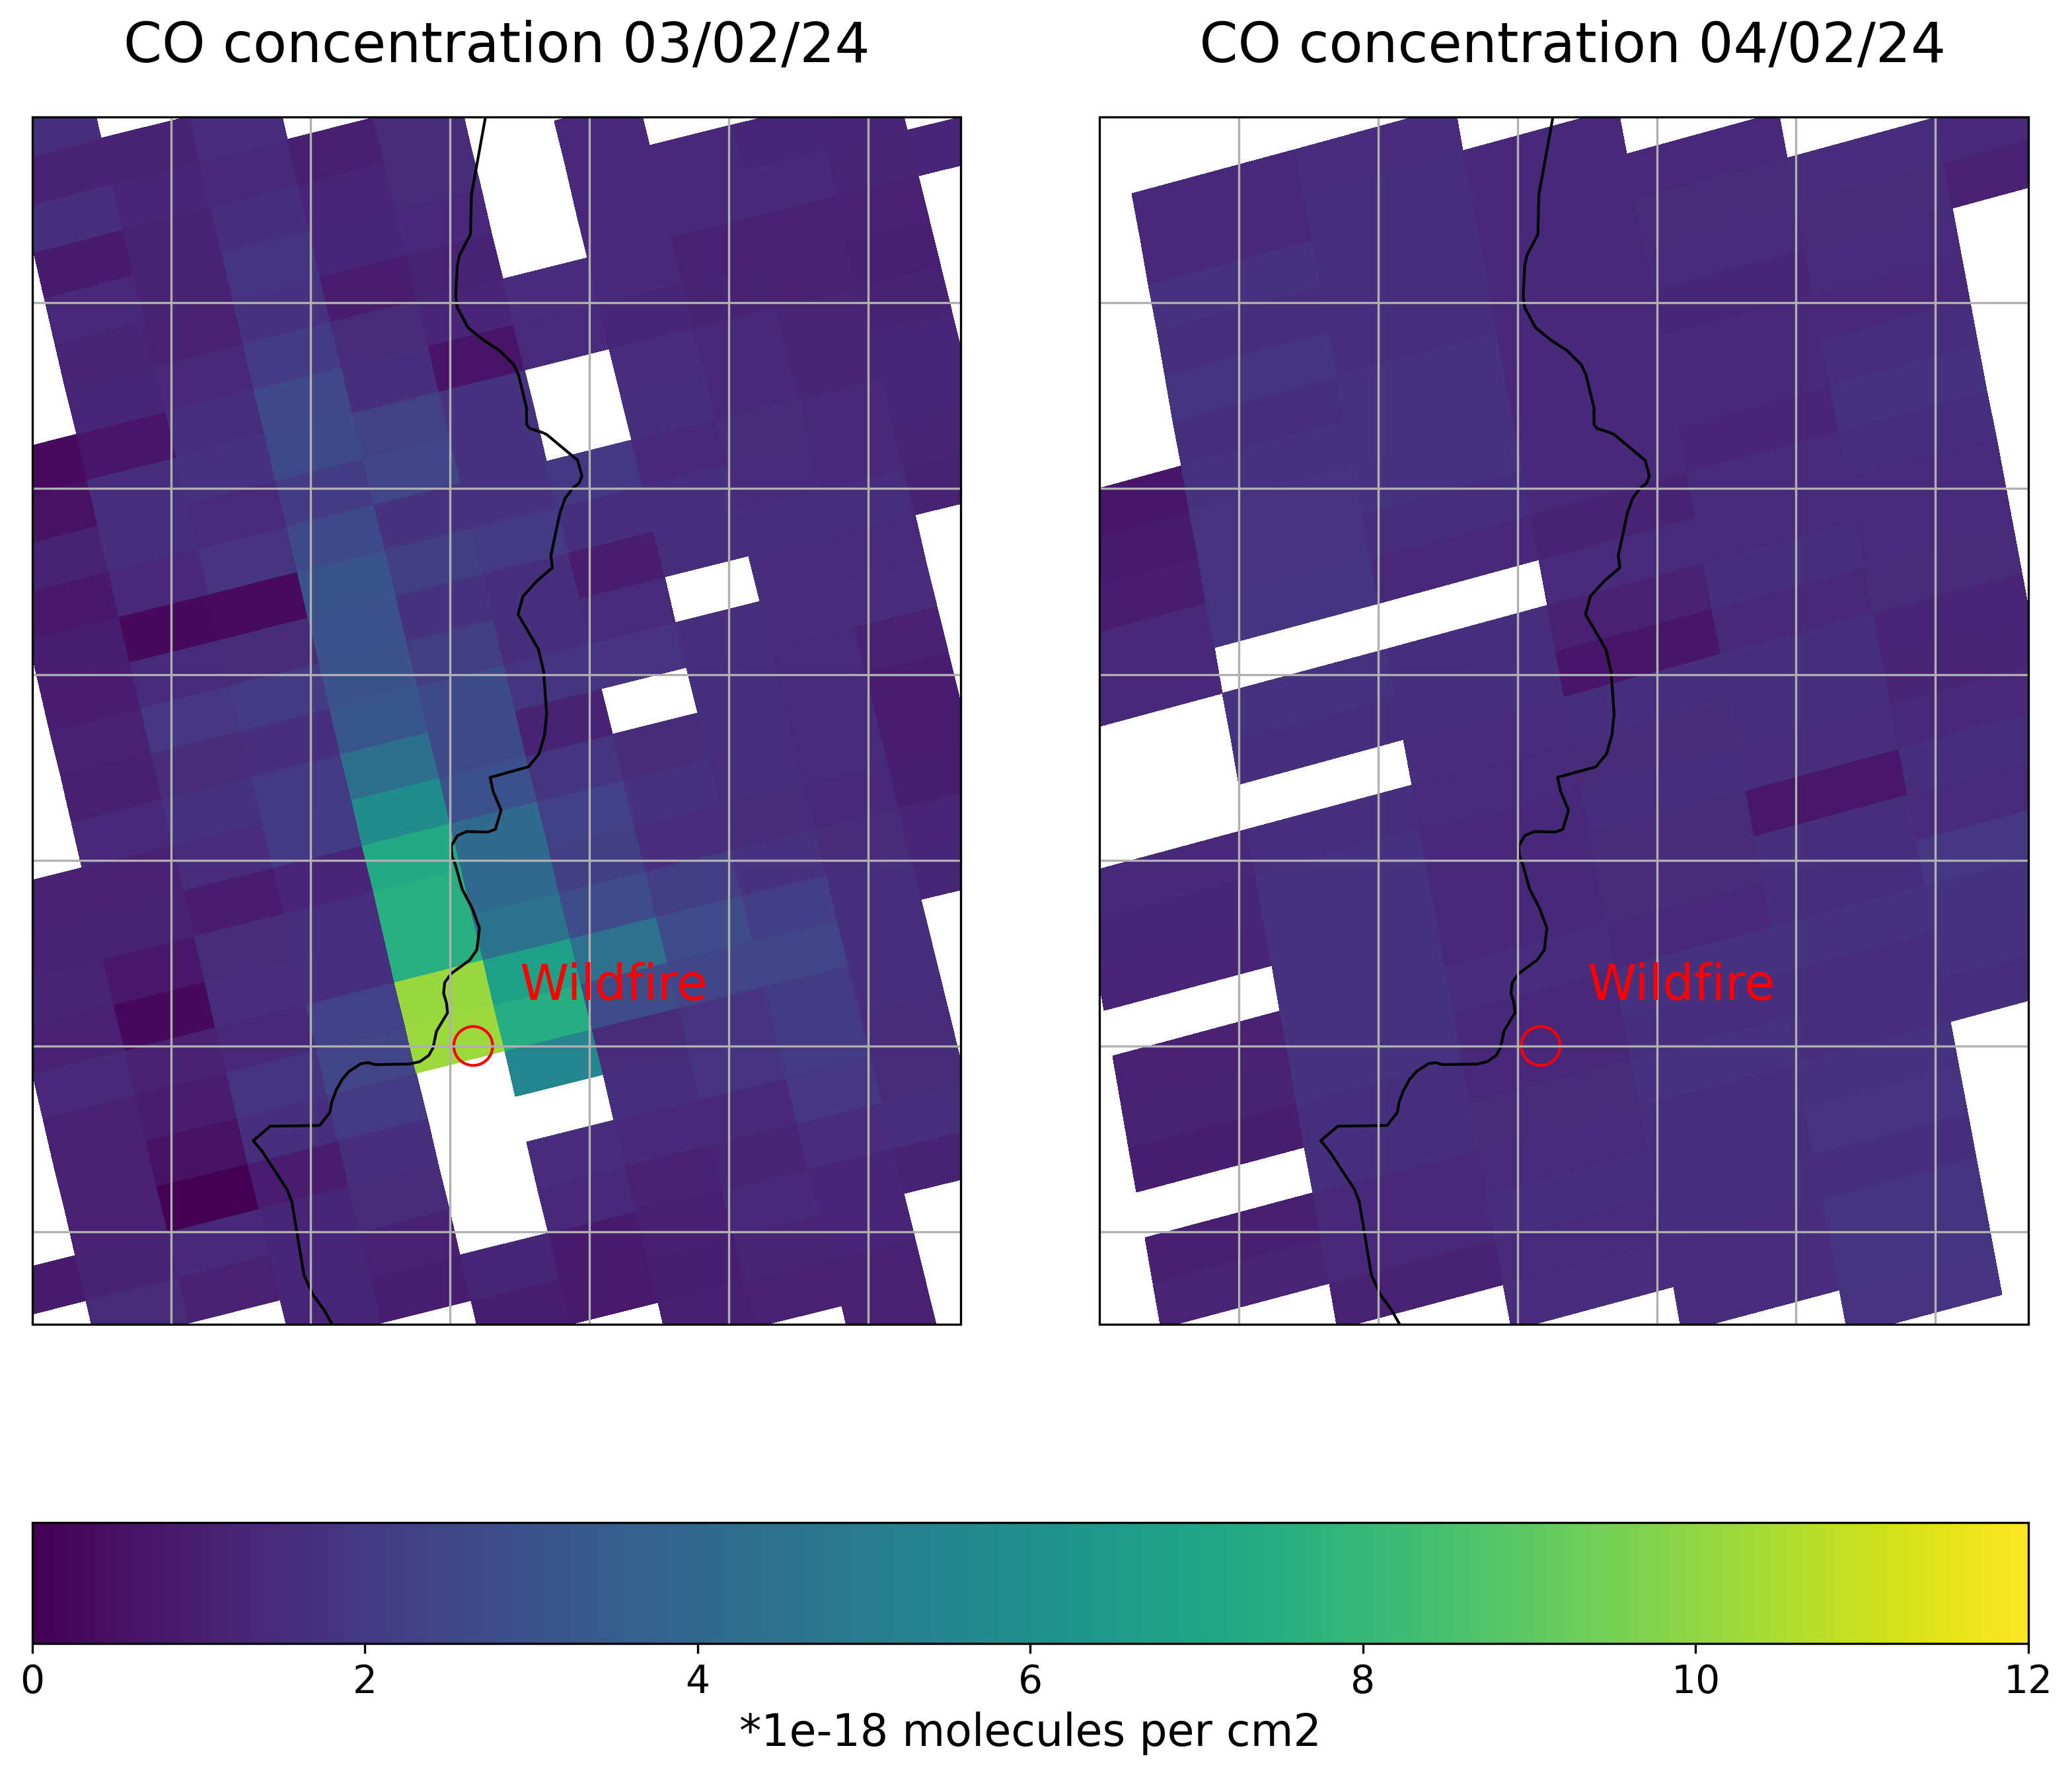

In [63]:
import matplotlib.pyplot as plt
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid

# Create a figure with the desired size
fig = plt.figure(figsize=(15, 10), dpi=300)
#fig, ax1 = plt.subplots(1, 1, figsize=(50, 80), dpi=300)
# Create a GeoAxes instance
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))

# Create a grid of GeoAxes
axgr = AxesGrid(fig, 111, axes_class=axes_class, nrows_ncols=(1, 2), axes_pad=0.7, cbar_location='bottom', cbar_mode='single', cbar_pad=0.3)

# Plot the first dataset on the first subplot
ax1 = axgr[0]
img1 = ax1.pcolormesh(longitude, latitude, data_array, 
    cmap=plt.get_cmap(color_scale),
    vmin=vmin,
    vmax=vmax,
    shading='auto',
    transform=projection)
ax1.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax1.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
ax1.set_extent([lonmin - 0, lonmax + 0, latmin - 0, latmax + 0], crs=projection)  # Adjust the extent to zoom out
ax1.gridlines()
#cbar1 = axgr.cbar_axes[0].colorbar(img1)
#cbar1.set_label(unit, fontsize=16)
#cbar1.ax.tick_params(labelsize=14)
ax1.set_title(long_name, fontsize=20, pad=20.0)
# Specify the coordinates of the specific point
specific_point_lon = -71.525
specific_point_lat = -33.0
# Plot a smaller circle around the specific point
ax1.scatter(specific_point_lon, specific_point_lat, color='none', edgecolors='red', marker='o', s=200)
# Add text label "Wildfire" closer to the circle
ax1.text(specific_point_lon + 0.05, specific_point_lat + 0.05, 'Wildfire', color='red', fontsize=18)

# Plot the second dataset on the second subplot
ax2 = axgr[1]
img2 = ax2.pcolormesh(longitude2, latitude2, data_array2, 
    cmap=plt.get_cmap(color_scale),
    vmin=vmin,
    vmax=vmax,
    shading='auto',
    transform=projection)
ax2.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=1)
ax2.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=1)
ax2.set_extent([lonmin + 0, lonmax - 0, latmin - 0, latmax + 0], crs=projection)  # Adjust the extent to zoom out
ax2.gridlines()
cbar2 = axgr.cbar_axes[0].colorbar(img2)
cbar2.ax.set_xlabel(unit, fontsize=16)
cbar2.ax.tick_params(labelsize=14)
ax2.set_title(long_name2, fontsize=20, pad=20.0)
# Specify the coordinates of the specific point
specific_point_lon = -71.525
specific_point_lat = -33.0
# Plot a smaller circle around the specific point
ax2.scatter(specific_point_lon, specific_point_lat, color='none', edgecolors='red', marker='o', s=200)
# Add text label "Wildfire" closer to the circle
ax2.text(specific_point_lon + 0.05, specific_point_lat + 0.05, 'Wildfire', color='red', fontsize=18)

plt.savefig('wildfire_co_300.png')


<hr>
<div class="alert alert-info" role="alert">

## 7. <a id='conc'></a>Conclusion
[Back to top](#content)

## Conclusion

From this notebook we can conclude that satellite data is very useful when it comes to spotting wildfires and seeing how they affect earth. Sattelites can take images of earth and we can tell if there is smoke on the image. We can use different color bands to see the difference between smoke and clouds. With CAMS data we can see the movement of black carbon emissions in the atmosphere. Sattelites can also measure the what the atmosphere consists of. You can look at the carbon monoxide concentration in the location of wildfires. We were suprised to see that the concentration of carbon monoxide decreased immensely in just 1 day.

## Sources

https://notebooks.prod.wekeo2.eu/notebook/wekeo4oceans/learn-olci/1_OLCI_introductory/1_4_OLCI_bands_imagery.ipynb

https://rapidmapping.emergency.copernicus.eu/EMSR715/download

https://en.wikipedia.org/wiki/2024_Chile_wildfires

<a href="https://www.wekeo.eu/data?view=viewer&t=1706970555607&z=0&center=-71.98537%2C-30.7734&zoom=14.03&layers=W3siaWQiOiJjMSIsInJlcGxhY2VtZW50Q29sb3JNYXBJZCI6bnVsbCwibGF5ZXJJZCI6IkVPOkVDTVdGOkRBVDpDQU1TX0dMT0JBTF9BVE1PU1BIRVJJQ19DT01QT1NJVElPTl9GT1JFQ0FTVFMvc2ZjL2JjYW9kNTUwIiwiekluZGV4IjoxMDB9XQ%3D%3D&objects=W3siaWQiOiJjMCIsInR5cGUiOiJhb2kiLCJjb29yZHMiOltbLTcxLjg0Mzc3MzgxNjA5NDgsLTMyLjIzOTI1MTAwNjUwODQyXSxbLTcxLjAzMzY5NDAzMzA2NjY3LC0zMy4zODEzNDQ0NTU3Njk2MTRdXX1d&initial=1&crs=epsg%3A3857" target="_blank">WEkEO data</a>

https://notebooks.prod.wekeo2.eu/notebook/wekeo4oceans/learn-olci/1_OLCI_introductory/1_5_OLCI_radiance_reflectance_spectra.ipynb

https://notebooks.prod.wekeo2.eu/notebook/wekeo4atmosphere/fire/31_CAMS_EAC4_explore.ipynb

https://notebooks.prod.wekeo2.eu/notebook/wekeo4climate/climate/portrait_of_a_lakes_death/Portrait_of_a_lakes_death.ipynb

https://notebooks.prod.wekeo2.eu/notebook/wekeo4climate/climate/adriatic-sea-temp-reanalysis/SST_WEkEO_Competition_Nereide.ipynb

https://chat.openai.com

<a href="https://www.wekeo.eu/data?view=viewer&t=1706970555607&z=0&center=-71.08914%2C-32.57703&zoom=17.33&layers=W3siaWQiOiJjMCIsIm9wZW5EcmF3ZXJOYW1lIjoic3Vic2V0dGVyIiwicmVwbGFjZW1lbnRDb2xvck1hcElkIjpudWxsLCJsYXllcklkIjoiRU86RVNBOkRBVDpTRU5USU5FTC01UDpUUk9QT01JL19fREVGQVVMVF9fL19fREVGQVVMVF9fIiwiekluZGV4IjoxMH1d&objects=W3siaWQiOiJjMCIsInR5cGUiOiJhb2kiLCJjb29yZHMiOltbLTcxLjg0Mzc3MzgxNjA5NDgsLTMyLjIzOTI1MTAwNjUwODQyXSxbLTcxLjAzMzY5NDAzMzA2NjY3LC0zMy4zODEzNDQ0NTU3Njk2MTRdXX1d&initial=1&crs=epsg%3A38577" target="_blank">Sentinel 5P Tropomi</a>

https://notebooks.prod.wekeo2.eu/notebook/wekeo4atmosphere/fire/11_Sentinel5P_L2_CO_explore.ipynb

https://notebooks.prod.wekeo2.eu/notebook/wekeo4atmosphere/fire/10_Sentinel5P_L2_CO_retrieve.ipynb
